#### USL

### About the dataset (CO<sub>2</sub> emission data)

In the dataset, the CO<sub>2</sub> emission for various regions in the world is given. Our objective is to group the regions based on the factors affecting the environment in terms of the greenhouse gases, where CO<sub>2</sub> is a primary greenhouse gas. 

Many developing and developed countries in the world are contributing to the CO<sub>2</sub> emission in the environment. It is interesting to know that the increase in atmospheric carbon dioxide is responsible for about two-thirds of the total energy imbalance that is causing Earth's temperature to rise and leads to global warming.

**Region**: Region of the country

**CO2 Emission**: Annual CO<sub>2</sub> emission (in tonnes)

**Ease of Business**: The ease of business in the country

**Energy Usage**: Energy used by the country in various forms

**GDP**: GDP of a country

**Internet Usage**: Usage of the internet 

**Population total**: Total population of a country

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df = pd.read_csv("CO2_emission_data.csv")
df.head()

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5.652325e+09,0.010,3033659
1,Europe,4166,151,2172,7.464447e+09,0.024,3014579
2,Europe,4254,151,2172,8.376484e+09,0.060,2992724
3,Europe,3865,151,2068,9.132562e+09,0.096,2968028
4,Europe,4056,151,2025,1.070101e+10,0.150,2940880



### Let's begin with some hands-on practice exercises


## Exploratory Data Analysis

#### Identifying the different regions to which the countries belong and visualize the count of countries.

<AxesSubplot:>

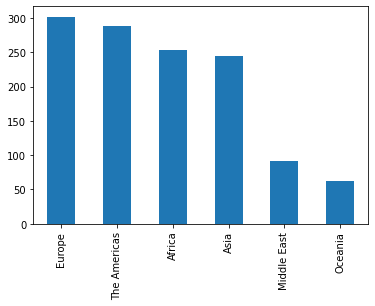

In [6]:
df['Region'].value_counts().plot(kind='bar')

Checking the datatypes, dimension and summary statistics of the data.

In [7]:
df.dtypes

Region               object
CO2 Emissions         int64
Ease of Business      int64
Energy Usage          int64
GDP                 float64
Internet Usage      float64
Population Total      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1243 non-null   object 
 1   CO2 Emissions     1243 non-null   int64  
 2   Ease of Business  1243 non-null   int64  
 3   Energy Usage      1243 non-null   int64  
 4   GDP               1243 non-null   float64
 5   Internet Usage    1236 non-null   float64
 6   Population Total  1243 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 68.1+ KB


In [10]:
df.describe()

,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
count,1.243000e+03,1243.000000,1.243000e+03,1.243000e+03,1236.000000,1.243000e+03
mean,1.897666e+05,88.279968,7.541842e+04,3.535548e+11,0.329983,4.513494e+07
std,7.697027e+05,52.770388,2.707586e+05,1.358970e+12,1.634042,1.600483e+08
min,4.800000e+01,1.000000,3.000000e+01,1.232585e+08,0.000000,6.966000e+04
25%,3.111500e+03,45.000000,2.721000e+03,7.746581e+09,0.062000,2.097088e+06
50%,1.620800e+04,85.000000,9.318000e+03,2.468037e+10,0.200500,7.739900e+06
75%,7.581200e+04,131.000000,3.495650e+04,1.770000e+11,0.460000,2.884664e+07
max,8.286892e+06,186.000000,2.727728e+06,1.620000e+13,57.000000,1.350695e+09


Droping the variables 'Region', 'Ease of Business', 'Internet Usage'

In [15]:
new_df = df.drop(labels = ['Region','Ease of Business','Internet Usage'],axis = 1)
new_df

,CO2 Emissions,Energy Usage,GDP,Population Total
0,4294,1976,5.652325e+09,3033659
1,4166,2172,7.464447e+09,3014579
2,4254,2172,8.376484e+09,2992724
3,3865,2068,9.132562e+09,2968028
4,4056,2025,1.070101e+10,2940880
...,...,...,...,...
1238,2274,7213,7.178556e+09,11470022
1239,2226,7396,1.070220e+10,11781612
1240,1654,7399,1.154142e+10,12109620
1241,1845,7641,1.464079e+10,12456527


Checking for missing values

In [16]:
new_df.isnull().sum()

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

Outlier Detection

<AxesSubplot:>

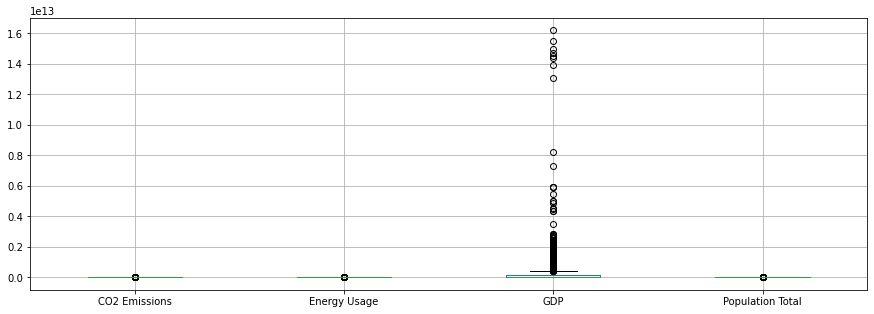

In [18]:
plt.figure(figsize=(15,5))
new_df.boxplot()


Removing Outliers

In [72]:
q1 = new_df.quantile(0.25)
q3 = new_df.quantile(0.75)

iqr = q3 - q1
iqr

co2_df = new_df[~((new_df < q1 - (3.5 * iqr)) | (new_df > q3 + (3.5 * iqr))).any(axis=1)]

Visualizing the data obtained after removing the outliers with the help of a boxplot

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


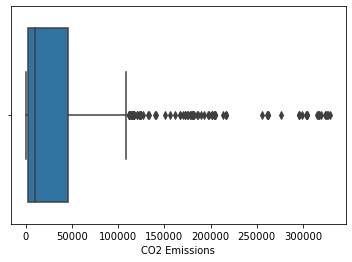

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


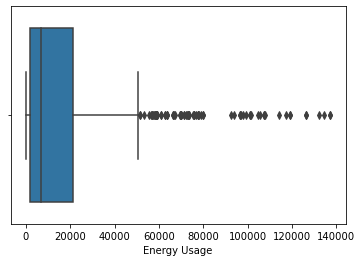

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


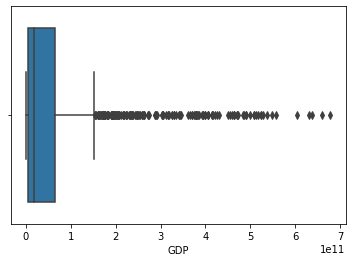

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population Total'>

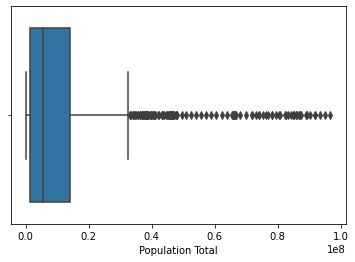

In [73]:
sns.boxplot(co2_df['CO2 Emissions'])
plt.show()
sns.boxplot(co2_df['Energy Usage'])
plt.show()
sns.boxplot(co2_df['GDP'])
plt.show()
sns.boxplot(co2_df['Population Total'])

Transforming the variables in the standard form such that they will have mean 0 and standard deviation 1 

In [74]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dff = pd.DataFrame(data =ss.fit_transform(co2_df),columns= co2_df.columns )
dff

,CO2 Emissions,Energy Usage,GDP,Population Total
0,-0.523682,-0.615122,-0.546747,-0.522900
1,-0.525836,-0.606536,-0.531386,-0.523940
2,-0.524355,-0.606536,-0.523654,-0.525130
3,-0.530902,-0.611092,-0.517245,-0.526476
4,-0.527688,-0.612976,-0.503949,-0.527955
...,...,...,...,...
1049,-0.557679,-0.385690,-0.533809,-0.063318
1050,-0.558487,-0.377673,-0.503939,-0.046343
1051,-0.568114,-0.377542,-0.496825,-0.028475
1052,-0.564900,-0.366940,-0.470552,-0.009577



## Hierarchical Clustering

Using the 'ward' linkage method  printing the first 10 observations of the linkage matrix.

In [75]:
import scipy.cluster.hierarchy as sch
link_mat = pd.DataFrame(sch.linkage(dff,method = 'ward'),columns = ['Ist obs','IInd Obs','euc dist','no.of obs'])

In [60]:
link_mat

,Ist obs,IInd Obs,euc dist,no.of obs
0,435.0,437.0,0.000002,2.0
1,446.0,447.0,0.000003,2.0
2,436.0,438.0,0.000008,2.0
3,36.0,37.0,0.000009,2.0
4,558.0,559.0,0.000009,2.0
...,...,...,...,...
1237,2476.0,2479.0,13.960832,150.0
1238,2477.0,2480.0,22.650387,1214.0
1239,2467.0,2478.0,27.899160,16.0
1240,2471.0,2481.0,38.336365,1227.0


Visualizing the Cluster obtained

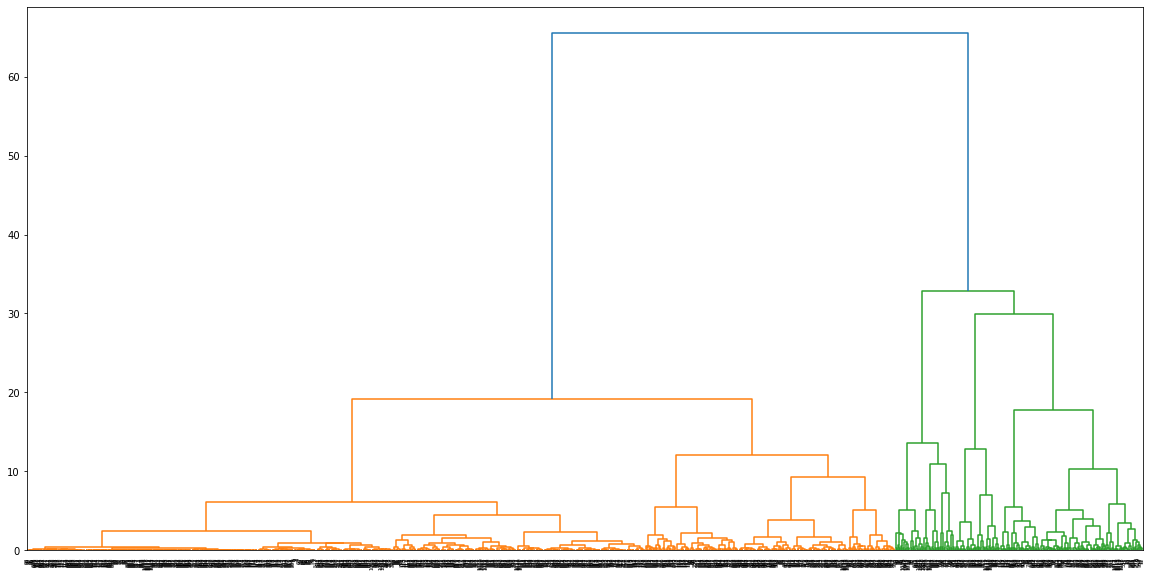

In [84]:
plt.figure(figsize=(20,10))
sch.dendrogram(link_mat.values)
plt.show()

cophenetic correlation coefficient

In [77]:
from scipy.cluster.hierarchy import cophenet
from sklearn.metrics.pairwise import euclidean_distances

ec_dist = euclidean_distances(dff)
dist_array = ec_dist[np.triu_indices(len(dff),k = 1)]

coph_corr,_ = cophenet(link_mat.values,dist_array)
coph_corr

0.7973822617121825

Instantiating clustering method with an optimal number of clusters and 'ward' linkage method.

In [78]:
from sklearn.cluster import AgglomerativeClustering
hca = AgglomerativeClustering(n_clusters=2, linkage='ward')

Obtaining the cluster labels and add a column containing the cluster number to the original data.

In [79]:
hca.fit(dff)
dff['Cluster'] = hca.labels_
dff

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
0,-0.523682,-0.615122,-0.546747,-0.522900,1
1,-0.525836,-0.606536,-0.531386,-0.523940,1
2,-0.524355,-0.606536,-0.523654,-0.525130,1
3,-0.530902,-0.611092,-0.517245,-0.526476,1
4,-0.527688,-0.612976,-0.503949,-0.527955,1
...,...,...,...,...,...
1049,-0.557679,-0.385690,-0.533809,-0.063318,1
1050,-0.558487,-0.377673,-0.503939,-0.046343,1
1051,-0.568114,-0.377542,-0.496825,-0.028475,1
1052,-0.564900,-0.366940,-0.470552,-0.009577,1


Finding the size of each cluster and plot the count plot for the cluster size.

In [80]:
dff['Cluster'].value_counts()


1    820
0    234
Name: Cluster, dtype: int64

Ploting the scatterplot to visualize the clusters using 'CO2 Emissions' and 'Energy Usage'

C:\Users\harip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


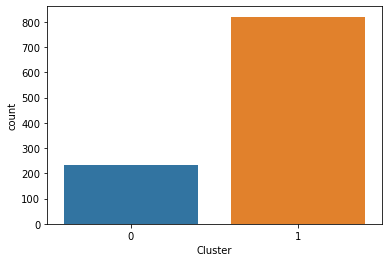

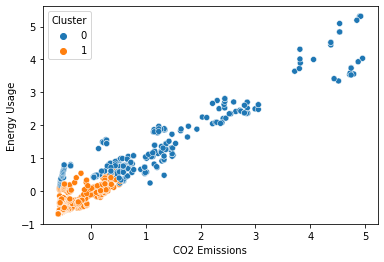

In [81]:
sns.countplot(dff['Cluster'])
plt.show()

sns.scatterplot(x = 'CO2 Emissions', y = 'Energy Usage', data = dff, hue = 'Cluster')
plt.show()

Obtaining the first 10 observations for 1st cluster and find its summary

In [82]:
dff[dff['Cluster'] == 0][:10].describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,Cluster
count,10.000000,10.000000,10.000000,10.000000,10.0
mean,1.280772,0.908386,0.575329,1.248179,0.0
std,0.219573,0.192753,0.390156,0.101382,0.0
min,0.910243,0.643183,-0.019378,1.109745,0.0
25%,1.167094,0.740343,0.308143,1.169344,0.0
50%,1.313934,0.924048,0.558215,1.240911,0.0
75%,1.482170,1.078894,0.833719,1.321631,0.0
max,1.500868,1.131838,1.134654,1.408181,0.0


Obtaining the first 10 observations for the 2nd cluster and find its summary

In [ ]:
dff[dff['Cluster'] == 2][:10].describe()